In [19]:
import numpy as np
from spec_id import Stack_model, Stack_spec, Model_fit_stack,Analyze_Stack_avgage,Analyze_Stack,Likelihood_contours, Gauss_dist, Make_model_list,\
    Stack_spec_normwmean,Stack_model_normwmean, Model_fit_stack_normwmean ,Best_fit_model, Scale_model
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [5]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_feb28.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

IDA=[]

IDc=[]  # low mtor sample
IDd=[]  # high mtor sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 1 < rshift[i] < 1.75:
        IDA.append(i)
    if 0.14 < comp[i] and 1 < rshift[i] < 1.75:
        IDd.append(i)
    if 0.14 > comp[i] and 1 < rshift[i] < 1.75:
        IDc.append(i)
    if 10.931 > lmass[i] and 1 < rshift[i] < 1.75:
        IDmL.append(i)
    if 10.931 < lmass[i] and 1 < rshift[i] < 1.75:
        IDmH.append(i)

metal=np.array([ 0.0020, 0.0025, 0.0031, 0.0039, 0.0049, 0.0061,  0.0068,  0.0077,  0.0085,  0.0096,  0.0106,
                  0.012, 0.0132, 0.014,  0.0150,  0.0164, 0.018,  0.019,  0.021,  0.024, 0.027, 0.03])
bcmetal=np.array([0.0001, 0.0004, 0.004, 0.008, 0.02])
age=np.arange(.5,6.1,.1)
tau=[0,8.0,8.15,8.28,8.43,8.57,8.72,8.86,9.0,9.14,9.29,9.43,9.57,9.71,9.86,10.0]

M,A=np.meshgrid(metal,age)
BM,BA=np.meshgrid(bcmetal,age)

s45972
n16758


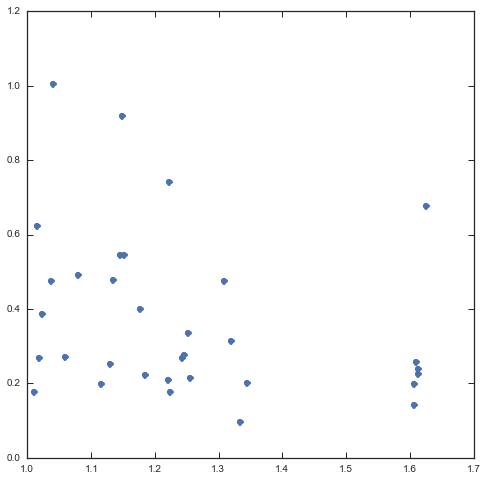

In [12]:
%matplotlib inline

print ids[IDA][np.argmax(rad[IDA])]
print ids[IDA][np.argmin(rshift[IDA])]

plt.figure(figsize=[8,8])
plt.plot(rshift[IDA],rad[IDA],'o')
plt.show()
plt.close()

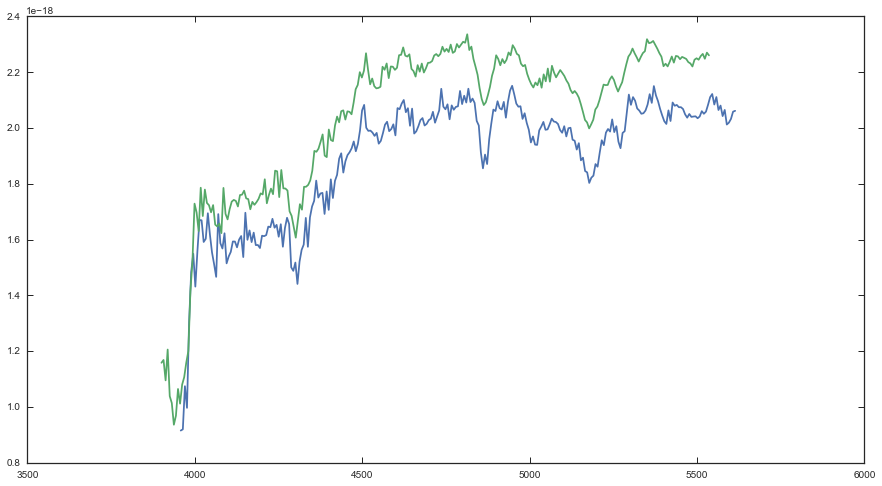

In [26]:
wv1,fl1=np.load('/Users/Vince.ec/fsps_models_for_fit/galaxy_models/m0.0132_a3.0_t0_z1.011_n16758_model.npy')
gwv1,gfl1,ger1=Readfile('spec_stacks_jan24/n16758_stack.dat')

IDW = []
for ii in range(len(gwv1)):
    if 7950 < gwv1[ii] < 11300:
        IDW.append(ii)
gwv1, gfl1, ger1 = np.array([gwv1[IDW], gfl1[IDW], ger1[IDW]])
        
iF = interp1d(wv1, fl1)(gwv1)
C = Scale_model(gfl1, ger1, iF)
F = C*iF + np.random.normal(0,ger1/10)

wv2,fl2=np.load('/Users/Vince.ec/fsps_models_for_fit/galaxy_models/m0.0132_a3.0_t0_z1.04_s45972_model.npy')
gwv2,gfl2,ger2=Readfile('spec_stacks_jan24/s45972_stack.dat')

IDW = []
for ii in range(len(gwv2)):
    if 7950 < gwv2[ii] < 11300:
        IDW.append(ii)
gwv2, gfl2, ger2 = np.array([gwv2[IDW], gfl2[IDW], ger2[IDW]])
        
iF2 = interp1d(wv2, fl2)(gwv2)
C2 = Scale_model(gfl2, ger2, iF2)
F2 = C2*iF2 + np.random.normal(0,ger2/10)

plt.figure(figsize=[15,8])
plt.plot(gwv1/2.011,F)
plt.plot(gwv2/2.04,F2)
# plt.plot(gwv1,gfl1)
# plt.plot(gwv2,gfl2)
# plt.plot(gwv1,ger1)
# plt.plot(gwv2,ger2)
plt.show()
plt.close()